In [1]:
import sys
sys.path.append("../../") # gruppe_3 als lib dir

import os

from gruppe_3.dataset import DatasetReader, InputMode
from sklearn.model_selection import train_test_split

dataset_reader = DatasetReader(
    os.environ.get('EXTRA_SENSORY_DATASET'),
    InputMode.users
)

X, y = dataset_reader.read()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


D:\Development\Projects\mustererkennung\data\00EABED2-271D-49D8-B599-1D4A09240601.features_labels.csv
D:\Development\Projects\mustererkennung\data\098A72A5-E3E5-4F54-A152-BBDA0DF7B694.features_labels.csv
D:\Development\Projects\mustererkennung\data\0A986513-7828-4D53-AA1F-E02D6DF9561B.features_labels.csv
D:\Development\Projects\mustererkennung\data\0BFC35E2-4817-4865-BFA7-764742302A2D.features_labels.csv
D:\Development\Projects\mustererkennung\data\0E6184E1-90C0-48EE-B25A-F1ECB7B9714E.features_labels.csv
D:\Development\Projects\mustererkennung\data\1155FF54-63D3-4AB2-9863-8385D0BD0A13.features_labels.csv
D:\Development\Projects\mustererkennung\data\11B5EC4D-4133-4289-B475-4E737182A406.features_labels.csv
D:\Development\Projects\mustererkennung\data\136562B6-95B2-483D-88DC-065F28409FD2.features_labels.csv
D:\Development\Projects\mustererkennung\data\1538C99F-BA1E-4EFB-A949-6C7C47701B20.features_labels.csv
D:\Development\Projects\mustererkennung\data\1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842.

In [4]:
y_train.columns


Index(['label:LOC_main_workplace', 'label:OR_indoors', 'label:ON_A_BUS',
       'label:DRIVE_-_I_M_THE_DRIVER', 'label:DRIVE_-_I_M_A_PASSENGER',
       'label:LOC_home', 'label:SHOPPING', 'label:STROLLING',
       'label:DRINKING__ALCOHOL_', 'label:CLEANING', 'label:WASHING_DISHES',
       'label:WATCHING_TV', 'label:SURFING_THE_INTERNET', 'label:LOC_beach',
       'label:SINGING', 'label:TALKING', 'label:COMPUTER_WORK', 'label:EATING',
       'label:TOILET', 'label:GROOMING', 'label:DRESSING',
       'label:STAIRS_-_GOING_UP', 'label:STAIRS_-_GOING_DOWN',
       'label:AT_SCHOOL', 'label:WITH_CO-WORKERS', 'label:WITH_FRIENDS',
       'label:phone', 'label:various_a', 'label:various_b',
       'label:main_activity', 'label:user_id'],
      dtype='object')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier, Pool

cat_features = [X.columns.get_loc(f) for f in dataset_reader.discrete_group_names]
clf = CatBoostClassifier(
            verbose=10,
            task_type="GPU",
            iterations=2500,
            l2_leaf_reg=3.0,
            loss_function = "MultiClass",
            depth = 6,
            random_state=42
        )
y_pred = clf.fit(X_train,y_train,cat_features=cat_features).predict(X_test)
accuracy_score(y_test,y_pred)


0:	learn: -1.3478057	total: 93.4ms	remaining: 3m 53s
10:	learn: -1.0890900	total: 947ms	remaining: 3m 34s
20:	learn: -0.9446196	total: 1.81s	remaining: 3m 33s
30:	learn: -0.8534450	total: 2.66s	remaining: 3m 31s
40:	learn: -0.7927358	total: 3.49s	remaining: 3m 29s
50:	learn: -0.7483966	total: 4.35s	remaining: 3m 28s
60:	learn: -0.7160613	total: 5.16s	remaining: 3m 26s
70:	learn: -0.6914396	total: 6s	remaining: 3m 25s
80:	learn: -0.6719233	total: 6.79s	remaining: 3m 22s
90:	learn: -0.6561691	total: 7.59s	remaining: 3m 21s
100:	learn: -0.6435053	total: 8.39s	remaining: 3m 19s
110:	learn: -0.6318358	total: 9.14s	remaining: 3m 16s
120:	learn: -0.6212390	total: 9.92s	remaining: 3m 15s
130:	learn: -0.6120211	total: 10.7s	remaining: 3m 13s
140:	learn: -0.6038814	total: 11.5s	remaining: 3m 12s
150:	learn: -0.5959124	total: 12.3s	remaining: 3m 10s
160:	learn: -0.5884121	total: 13s	remaining: 3m 9s
170:	learn: -0.5808924	total: 13.8s	remaining: 3m 8s
180:	learn: -0.5739928	total: 14.6s	remaining

0.9002243736970426

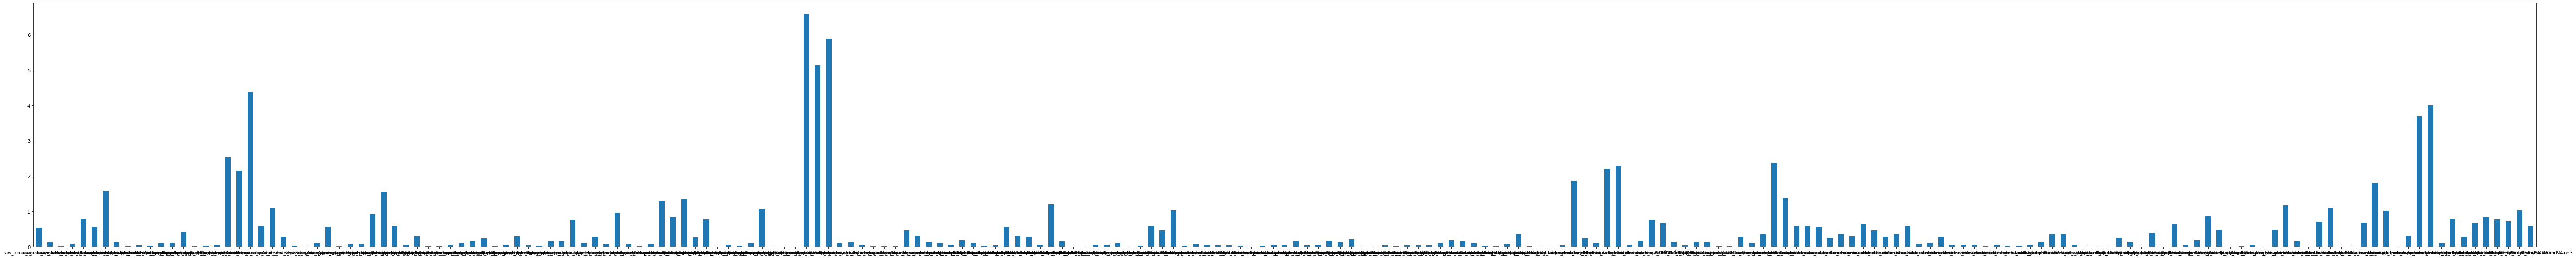

In [10]:
from catboost import Pool
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [100, 10]

cat_boost = clf.named_steps['classify']
importance=pd.Series(cat_boost.get_feature_importance(Pool(X_test, label=y_test)),index=X_test.columns,name="importance")
importance.plot.bar(y='importance',rot=0)
